In [1]:
!nvidia-smi  # Verify GPU allocation
!python --version  # Python 3.10+

Mon Apr 14 17:27:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118
!pip install facenet-pytorch albumentations kagglehub
!pip install torchmetrics[image] -U

ERROR: Could not find a version that satisfies the requirement torch==2.0.1+cu118 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.2 MB/s eta 0:00:00
   ━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 27.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [1]:
!kaggle datasets list  # Should display datasets if setup is correct

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
!kaggle datasets download -d shuvoalok/raf-db-dataset

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other


In [4]:
!kaggle datasets download -d arnabkumarroy02/ferplus

Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT


In [5]:
# 1. RAF-DB
!kaggle datasets download -d shuvoalok/raf-db-dataset
!unzip raf-db-dataset.zip -d data/rafdb

# 2. FERPlus
!kaggle datasets download -d arnabkumarroy02/ferplus
!unzip ferplus.zip -d data/ferplus

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other
raf-db-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  raf-db-dataset.zip
checkdir:  cannot create extraction directory: data/rafdb
           No such file or directory
Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT
ferplus.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ferplus.zip
checkdir:  cannot create extraction directory: data/ferplus
           No such file or directory


In [ ]:
ls


ferplus.zip  kaggle.json  raf-db-dataset.zip  sample_data/


In [ ]:
ls -la?

Object `la` not found.


In [ ]:
ls -la

total 537244
drwxr-xr-x 1 root root      4096 Apr 13 20:56 ./
drwxr-xr-x 1 root root      4096 Apr 13 20:39 ../
drwxr-xr-x 4 root root      4096 Apr 10 13:37 .config/
-rw-r--r-- 1 root root 510597112 Apr 13  2024 ferplus.zip
-rw-r--r-- 1 root root        66 Apr 13 20:53 kaggle.json
-rw-r--r-- 1 root root  39511472 Sep 20  2023 raf-db-dataset.zip
drwxr-xr-x 1 root root      4096 Apr 10 13:37 sample_data/


In [6]:
!mkdir -p data/rafdb
!mkdir -p data/ferplus

In [7]:
# RAF-DB (correct dataset)
!kaggle datasets download -d pavansanagapati/rafdb-dataset -p data/rafdb --force
!unzip -q data/rafdb/rafdb-dataset.zip -d data/rafdb

# FERPlus (direct path)
!kaggle datasets download -d arnabkumarroy02/ferplus -p data/ferplus --force
!unzip -q data/ferplus/ferplus.zip -d data/ferplus

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/pavansanagapati/rafdb-dataset
unzip:  cannot find or open data/rafdb/rafdb-dataset.zip, data/rafdb/rafdb-dataset.zip.zip or data/rafdb/rafdb-dataset.zip.ZIP.
Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT
 99% 481M/487M [00:01<00:00, 323MB/s]
100% 487M/487M [00:01<00:00, 417MB/s]


In [ ]:
ls -la

total 537248
drwxr-xr-x 1 root root      4096 Apr 13 21:06 ./
drwxr-xr-x 1 root root      4096 Apr 13 20:39 ../
drwxr-xr-x 4 root root      4096 Apr 10 13:37 .config/
drwxr-xr-x 4 root root      4096 Apr 13 21:06 data/
-rw-r--r-- 1 root root 510597112 Apr 13  2024 ferplus.zip
-rw-r--r-- 1 root root        66 Apr 13 20:53 kaggle.json
-rw-r--r-- 1 root root  39511472 Sep 20  2023 raf-db-dataset.zip
drwxr-xr-x 1 root root      4096 Apr 10 13:37 sample_data/


In [8]:
!rm -rf data/  # Remove previous attempts
!mkdir -p data/rafdb data/ferplus  # Create nested directories

In [9]:
# RAF-DB (official mirror)
!kaggle datasets download -d pavansanagapati/rafdb-dataset -p data/rafdb --force

# FERPlus (direct download)
!kaggle datasets download -d arnabkumarroy02/ferplus -p data/ferplus --force

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/pavansanagapati/rafdb-dataset
Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT
 95% 465M/487M [00:01<00:00, 324MB/s]
100% 487M/487M [00:01<00:00, 400MB/s]


In [10]:
import os

print("RAF-DB Contents:", os.listdir("data/rafdb"))
print("FERPlus Contents:", os.listdir("data/ferplus"))

RAF-DB Contents: []
FERPlus Contents: ['ferplus.zip']


In [11]:
ls


data/  ferplus.zip  kaggle.json  raf-db-dataset.zip  sample_data/


In [12]:
# Create directory structure
!mkdir -p data/rafdb

# Move existing zip to target folder
!mv raf-db-dataset.zip data/rafdb/

# Unzip with full path
!unzip -q data/rafdb/raf-db-dataset.zip -d data/rafdb

# Verify
print("RAF-DB Contents:", os.listdir("data/rafdb"))
# Should show: ['test', 'train', 'raf-db-dataset.zip']

RAF-DB Contents: ['test_labels.csv', 'train_labels.csv', 'DATASET', 'raf-db-dataset.zip']


In [ ]:
ls


data/  ferplus.zip  kaggle.json  sample_data/


In [13]:
# Create directory
!mkdir -p data/ferplus

# Move existing zip
!mv ferplus.zip data/ferplus/

# Unzip
!unzip -q data/ferplus/ferplus.zip -d data/ferplus

# Verify
print("FERPlus Contents:", os.listdir("data/ferplus"))
# Should show: ['test', 'train', 'validation', 'ferplus.zip']

FERPlus Contents: ['ferplus.zip', 'validation', 'test', 'train']


In [14]:
import os
from pathlib import Path

def check_dataset(dataset_name, base_path, expected_dirs):
    """Check dataset availability and structure"""
    print(f"\nChecking {dataset_name}:")
    path = Path(base_path)

    if not path.exists():
        print(f"❌ Dataset not found at {base_path}")
        return False

    missing = []
    for dir in expected_dirs:
        if not (path/dir).exists():
            missing.append(dir)

    if missing:
        print(f"❌ Missing directories: {missing}")
        return False

    # Count sample images
    img_count = sum(1 for _ in path.glob('**/*.jpg') if _.is_file())
    print(f"✅ Found {img_count} images in proper structure")
    return True

# Check RAF-DB
rafdb_valid = check_dataset(
    "RAF-DB",
    "data/rafdb",
    ["train", "test"]
)

# Check FERPlus
ferplus_valid = check_dataset(
    "FERPlus",
    "data/ferplus",
    ["train", "test", "validation"]
)

# Check AffectNet (requires manual download)
affectnet_path = Path("data/affectnet")
affectnet_valid = affectnet_path.exists() and any(affectnet_path.iterdir())
print("\nChecking AffectNet:")
if affectnet_valid:
    print("✅ Found AffectNet dataset")
else:
    print("❌ AffectNet not found - download from:")
    print("http://mohammadmahoor.com/affectnet/")

# Final report
print("\nDataset Status:")
print(f"RAF-DB: {'✅' if rafdb_valid else '❌'}")
print(f"FERPlus: {'✅' if ferplus_valid else '❌'}")
print(f"AffectNet: {'✅' if affectnet_valid else '❌ (Needs manual download)'}")

# Suggested next steps
if rafdb_valid and ferplus_valid:
    print("\nReady to proceed with RAF-DB and FERPlus!")
elif rafdb_valid or ferplus_valid:
    print("\n⚠️ Partial datasets available - consider completing downloads")
else:
    print("\n❌ No valid datasets found - check setup steps")


Checking RAF-DB:
❌ Missing directories: ['train', 'test']

Checking FERPlus:
✅ Found 0 images in proper structure

Checking AffectNet:
❌ AffectNet not found - download from:
http://mohammadmahoor.com/affectnet/

Dataset Status:
RAF-DB: ❌
FERPlus: ✅
AffectNet: ❌ (Needs manual download)

⚠️ Partial datasets available - consider completing downloads


In [ ]:
ls

data/  kaggle.json  sample_data/


In [ ]:
ls data

ferplus/  rafdb/


In [15]:
# Clean existing setup
!rm -rf data/rafdb/*

# Verify zip file contents
!unzip -l data/rafdb/raf-db-dataset.zip

# Proper extraction (assuming standard RAF-DB structure)
!unzip -q data/rafdb/raf-db-dataset.zip -d data/rafdb

# Force correct directory structure if needed
!mkdir -p data/rafdb/{train,test}
!mv data/rafdb/DATASET/train/* data/rafdb/train/
!mv data/rafdb/DATASET/test/* data/rafdb/test/

unzip:  cannot find or open data/rafdb/raf-db-dataset.zip, data/rafdb/raf-db-dataset.zip.zip or data/rafdb/raf-db-dataset.zip.ZIP.
unzip:  cannot find or open data/rafdb/raf-db-dataset.zip, data/rafdb/raf-db-dataset.zip.zip or data/rafdb/raf-db-dataset.zip.ZIP.
mv: cannot stat 'data/rafdb/DATASET/train/*': No such file or directory
mv: cannot stat 'data/rafdb/DATASET/test/*': No such file or directory


In [16]:
# 1. RAF-DB
!kaggle datasets download -d shuvoalok/raf-db-dataset
!unzip raf-db-dataset.zip -d data/rafdb

# 2. FERPlus
!kaggle datasets download -d arnabkumarroy02/ferplus
!unzip ferplus.zip -d data/ferplus

Streaming output truncated to the last 5000 lines.
  inflating: data/ferplus/validation/fear/augmented_406.png  
  inflating: data/ferplus/validation/fear/augmented_407.png  
  inflating: data/ferplus/validation/fear/augmented_408.png  
  inflating: data/ferplus/validation/fear/augmented_409.png  
  inflating: data/ferplus/validation/fear/augmented_41.png  
  inflating: data/ferplus/validation/fear/augmented_410.png  
  inflating: data/ferplus/validation/fear/augmented_411.png  
  inflating: data/ferplus/validation/fear/augmented_412.png  
  inflating: data/ferplus/validation/fear/augmented_413.png  
  inflating: data/ferplus/validation/fear/augmented_414.png  
  inflating: data/ferplus/validation/fear/augmented_415.png  
  inflating: data/ferplus/validation/fear/augmented_416.png  
  inflating: data/ferplus/validation/fear/augmented_417.png  
  inflating: data/ferplus/validation/fear/augmented_418.png  
  inflating: data/ferplus/validation/fear/augmented_419.png  
  inflating: data/fe

In [ ]:
ls


data/  ferplus.zip  kaggle.json  raf-db-dataset.zip  sample_data/


In [17]:
!kaggle datasets download -d ananthu017/emotion-detection-fer
!unzip -q emotion-detection-fer.zip -d data/emotion_fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0


In [ ]:
ls

data/                      ferplus.zip  raf-db-dataset.zip
emotion-detection-fer.zip  kaggle.json  sample_data/


In [18]:
# Check dataset structures
!ls data/rafdb
!ls data/ferplus
!ls data/emotion_fer

# Expected structure:
# RAF-DB: Train/Test folders with emotion-labeled subfolders
# FERPlus: train.csv, test.csv with pixel arrays
# Emotion FER: train/, test/ folders with 7 emotion subfolders

DATASET  test  test_labels.csv	train  train_labels.csv
ferplus.zip  test  train  validation
test  train


In [19]:
# Check dataset structures
!ls -la data/rafdb
!ls -la data/ferplus
!ls -la data/emotion_fer

# Expected structure:
# RAF-DB: Train/Test folders with emotion-labeled subfolders
# FERPlus: train.csv, test.csv with pixel arrays
# Emotion FER: train/, test/ folders with 7 emotion subfolders

total 420
drwxr-xr-x 5 root root   4096 Apr 14 17:49 .
drwxr-xr-x 5 root root   4096 Apr 14 17:50 ..
drwxr-xr-x 4 root root   4096 Apr 14 17:49 DATASET
drwxr-xr-x 2 root root   4096 Apr 14 17:49 test
-rw-r--r-- 1 root root  76713 Sep 20  2023 test_labels.csv
drwxr-xr-x 2 root root   4096 Apr 14 17:49 train
-rw-r--r-- 1 root root 331330 Sep 20  2023 train_labels.csv
total 498656
drwxr-xr-x  5 root root      4096 Apr 14 17:48 .
drwxr-xr-x  5 root root      4096 Apr 14 17:50 ..
-rw-r--r--  1 root root 510597112 Apr 13  2024 ferplus.zip
drwxr-xr-x 10 root root      4096 Apr 14 17:48 test
drwxr-xr-x 10 root root      4096 Apr 14 17:48 train
drwxr-xr-x 10 root root      4096 Apr 14 17:48 validation
total 16
drwxr-xr-x 4 root root 4096 Apr 14 17:50 .
drwxr-xr-x 5 root root 4096 Apr 14 17:50 ..
drwxr-xr-x 9 root root 4096 Apr 14 17:50 test
drwxr-xr-x 9 root root 4096 Apr 14 17:50 train


In [20]:
# FERPlus CSV-to-image conversion
import pandas as pd
from PIL import Image

df = pd.read_csv("data/ferplus/train.csv")
for idx, row in df.iterrows():
    pixels = np.array(row['pixels'].split(), dtype=np.uint8)
    img = Image.fromarray(pixels.reshape(48, 48))
    img.save(f"data/ferplus/images/train/{row['emotion']}/{idx}.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train.csv'

In [21]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [22]:
!pip install pandas


In [23]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [24]:
!pip install --upgrade numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [25]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [26]:
!pip install pandas==2.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [27]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [28]:
# Run this first to restart the environment
exit()

In [1]:
import numpy as np
print(np.__version__)  # Should show 1.23.5

2.2.4


In [2]:
# Uninstall existing numpy
!pip uninstall -y numpy

# Install specific compatible version
!pip install numpy==1.23.5 --force-reinstall

# Verify installation
!pip show numpy | grep Version

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentat

Version: 1.23.5


In [1]:
# Uninstall existing numpy
!pip uninstall -y numpy

# Install specific compatible version
!pip install numpy==1.23.5 --force-reinstall

# Verify installation
!pip show numpy | grep Version

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 

^C


In [1]:
import numpy as np
print(np.__version__)  # Should show 1.23.5

1.23.5


In [2]:
# Install other required packages AFTER numpy
!pip install pandas pillow facenet-pytorch

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [ ]:
ls

data/                      ferplus.zip  raf-db-dataset.zip
emotion-detection-fer.zip  kaggle.json  sample_data/


In [4]:
# Delete existing data and reinstall datasets properly
!rm -rf data/
!mkdir -p data/{rafdb,ferplus,fer2013}

# Unzip datasets with proper structure
!unzip raf-db-dataset.zip -d data/rafdb
!unzip ferplus.zip -d data/ferplus
!unzip emotion-detection-fer.zip -d data/fer2013

# Verify directory structure
!find data/ -maxdepth 3 -type d

Streaming output truncated to the last 5000 lines.
  inflating: data/fer2013/train/sad/im3744.png  
  inflating: data/fer2013/train/sad/im3745.png  
  inflating: data/fer2013/train/sad/im3746.png  
  inflating: data/fer2013/train/sad/im3747.png  
  inflating: data/fer2013/train/sad/im3748.png  
  inflating: data/fer2013/train/sad/im3749.png  
  inflating: data/fer2013/train/sad/im375.png  
  inflating: data/fer2013/train/sad/im3750.png  
  inflating: data/fer2013/train/sad/im3751.png  
  inflating: data/fer2013/train/sad/im3752.png  
  inflating: data/fer2013/train/sad/im3753.png  
  inflating: data/fer2013/train/sad/im3754.png  
  inflating: data/fer2013/train/sad/im3755.png  
  inflating: data/fer2013/train/sad/im3756.png  
  inflating: data/fer2013/train/sad/im3757.png  
  inflating: data/fer2013/train/sad/im3758.png  
  inflating: data/fer2013/train/sad/im3759.png  
  inflating: data/fer2013/train/sad/im376.png  
  inflating: data/fer2013/train/sad/im3760.png  
  inflating: data/fe

In [5]:
import torch
import albumentations as A
import numpy as np
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Hardware setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# Initialize face detector with GPU acceleration
mtcnn = MTCNN(
    keep_all=True,
    post_process=False,
    device=device,
    thresholds=[0.7, 0.8, 0.8]  # More robust face detection
)

Using device: cuda


In [6]:
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.dataset_name = dataset_name
        self.phase = phase
        self.image_paths = []
        self.labels = []
        self.emotion_map = {
            'neutral': 0, 'happy': 1, 'sad': 2, 'surprise': 3,
            'fear': 4, 'disgust': 5, 'anger': 6, 'contempt': 7
        }

        # Dataset-specific loading
        if dataset_name == "RAF-DB":
            self._load_rafdb(f"{root_dir}/rafdb")
        elif dataset_name == "FERPlus":
            self._load_ferplus(f"{root_dir}/ferplus")
        elif dataset_name == "FER2013":
            self._load_fer2013(f"{root_dir}/fer2013")

        # Advanced augmentation pipeline
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=3,
                           max_height=40,
                           max_width=40,
                           fill_value=0.5,
                           p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

    def _load_rafdb(self, path):
        # Load RAF-DB from organized folders
        for emotion in os.listdir(f"{path}/train"):
            for img_file in os.listdir(f"{path}/train/{emotion}"):
                self.image_paths.append(f"{path}/train/{emotion}/{img_file}")
                self.labels.append(self.emotion_map[emotion.lower()])

    def _load_ferplus(self, path):
        # Load FERPlus from CSV structure
        df = pd.read_csv(f"{path}/label.csv")
        for _, row in df.iterrows():
            self.image_paths.append(f"{path}/images/{row['filename']}")
            self.labels.append(row['emotion'])

    def _load_fer2013(self, path):
        # Load FER2013 from emotion folders
        for emotion in os.listdir(f"{path}/train"):
            for img_file in os.listdir(f"{path}/train/{emotion}"):
                self.image_paths.append(f"{path}/train/{emotion}/{img_file}")
                self.labels.append(self.emotion_map[emotion.lower()])

    def __len__(self):
        return len(self.image_paths)

    def _generate_dummy_sample(self):
        """Create blank image for failed samples"""
        return torch.zeros((3, 224, 224)), -1

    def __getitem__(self, idx):
        try:
            # Load and align face
            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = mtcnn(img)

            if faces is None or len(faces) == 0:
                raise RuntimeError("No face detected")

            # Convert to numpy array for albumentations
            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            return torch.from_numpy(augmented).permute(2,0,1).float(), self.labels[idx]

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

In [7]:
# Example usage
raf_train = DSANDataset("RAF-DB", "data", "train")
ferplus_train = DSANDataset("FERPlus", "data", "train")
fer2013_train = DSANDataset("FER2013", "data", "train")

# Combined dataset
combined_dataset = torch.utils.data.ConcatDataset(
    [raf_train, ferplus_train, fer2013_train]
)

# Create dataloader with error filtering
def collate_fn(batch):
    # Filter out dummy samples
    batch = [item for item in batch if item[1] != -1]
    return torch.utils.data.default_collate(batch)

train_loader = DataLoader(
    combined_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    collate_fn=collate_fn,
    persistent_workers=True
)

FileNotFoundError: [Errno 2] No such file or directory: 'data/rafdb/train'

In [8]:
!find data/rafdb -maxdepth 3 -type d

data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/test/3
data/rafdb/DATASET/test/6
data/rafdb/DATASET/test/7
data/rafdb/DATASET/test/2
data/rafdb/DATASET/test/1
data/rafdb/DATASET/test/4
data/rafdb/DATASET/test/5
data/rafdb/DATASET/train
data/rafdb/DATASET/train/3
data/rafdb/DATASET/train/6
data/rafdb/DATASET/train/7
data/rafdb/DATASET/train/2
data/rafdb/DATASET/train/1
data/rafdb/DATASET/train/4
data/rafdb/DATASET/train/5


In [9]:
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # ... [previous initializations] ...

        if dataset_name == "RAF-DB":
            actual_path = os.path.join(root_dir, "rafdb/DATASET")  # Modified path
            if not os.path.exists(actual_path):
                raise FileNotFoundError(f"RAF-DB base path {actual_path} not found!")

            # Updated path handling for your structure
            phase_path = os.path.join(actual_path, phase)
            if not os.path.exists(phase_path):
                raise FileNotFoundError(
                    f"RAF-DB {phase} folder not found at {phase_path}. "
                    f"Existing: {os.listdir(actual_path)}"
                )

            self._load_rafdb_numeric_folders(phase_path)

    def _load_rafdb_numeric_folders(self, path):
        """Load from numeric folders 1-7 with RAF-DB mapping"""
        print(f"Loading RAF-DB from: {path}")

        # Official RAF-DB label mapping
        numeric_to_emotion = {
            '1': 'surprise',
            '2': 'fear',
            '3': 'disgust',
            '4': 'happiness',
            '5': 'sadness',
            '6': 'anger',
            '7': 'neutral'
        }

        for numeric_folder in os.listdir(path):
            emotion = numeric_to_emotion.get(numeric_folder)
            if not emotion:
                continue

            folder_path = os.path.join(path, numeric_folder)
            if not os.path.isdir(folder_path):
                continue

            for img_file in os.listdir(folder_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(folder_path, img_file))
                    self.labels.append(self.emotion_map[emotion])

        print(f"Loaded {len(self.image_paths)} {self.phase} samples from RAF-DB")

# Usage
raf_train = DSANDataset("RAF-DB", "data", "train")  # Loads from data/rafdb/DATASET/train
raf_test = DSANDataset("RAF-DB", "data", "test")    # Loads from data/rafdb/DATASET/test

Loading RAF-DB from: data/rafdb/DATASET/train


AttributeError: 'DSANDataset' object has no attribute 'image_paths'

In [10]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # Initialize core attributes first
        self.image_paths = []  # Now properly initialized
        self.labels = []       # Now properly initialized
        self.dataset_name = dataset_name
        self.phase = phase
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'sadness': 2, 'surprise': 3,
            'fear': 4, 'disgust': 5, 'anger': 6, 'contempt': 7
        }

        # Dataset loading
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB from your specific structure"""
        print(f"Loading RAF-DB from: {path}")

        # Official RAF-DB numeric to emotion mapping
        folder_to_emotion = {
            '1': 'surprise',
            '2': 'fear',
            '3': 'disgust',
            '4': 'happiness',
            '5': 'sadness',
            '6': 'anger',
            '7': 'neutral'
        }

        # Load images from numeric subfolders
        for folder in os.listdir(path):
            emotion = folder_to_emotion.get(folder)
            if not emotion:
                continue

            folder_path = os.path.join(path, folder)
            for img_file in os.listdir(folder_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(folder_path, img_file))
                    self.labels.append(self.emotion_map[emotion])

        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Your existing implementation
        # ...

# Test initialization
raf_train = DSANDataset("RAF-DB", "data", "train")
print(f"Successfully initialized with {len(raf_train)} samples")

IndentationError: expected an indented block after function definition on line 54 (<ipython-input-10-669f30748fbf>, line 59)

In [11]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # Initialize attributes
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'sadness': 2,
            'surprise': 3, 'fear': 4, 'disgust': 5,
            'anger': 6, 'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB dataset from numeric folders"""
        print(f"Loading RAF-DB from: {path}")

        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness',
            '6': 'anger', '7': 'neutral'
        }

        for folder in os.listdir(path):
            emotion = folder_to_emotion.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])

        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
      try:
          # Load image
          img_path = self.image_paths[idx]
          img = Image.open(img_path).convert('RGB')

          # Face detection & alignment
          faces = self.face_detector(img)
          if faces is None or len(faces) == 0:
              raise RuntimeError("No face detected")

          # Convert tensor to numpy for albumentations
          face = faces[0].permute(1,2,0).cpu().numpy()
          face = (face * 255).astype(np.uint8)

          # Apply augmentations
          augmented = self.transform(image=face)['image']

          # Convert back to tensor
          tensor = torch.from_numpy(augmented).permute(2,0,1).float()
          return tensor, self.labels[idx]

      except Exception as e:
          print(f"Error in {img_path}: {str(e)}")
          return self._generate_dummy_sample()

def _generate_dummy_sample(self):
    """Black image + invalid label"""
    return torch.zeros((3, 224, 224)), -1

# Initialize dataset
raf_train = DSANDataset("RAF-DB", "data", "train")
print(f"Successfully loaded {len(raf_train)} training samples")

Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Successfully loaded 12271 training samples


In [12]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # Initialize core components
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.face_detector = MTCNN(keep_all=True, device=device)

        # Initialize augmentations
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=3,
                          max_height=40,
                          max_width=40,
                          fill_value=0.5,
                          p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        # Emotion mappings
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'sadness': 2,
            'surprise': 3, 'fear': 4, 'disgust': 5,
            'anger': 6, 'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    # --------------------------
    # Dataset Loading Methods
    # --------------------------
    def _load_rafdb(self, path):
        """Load RAF-DB dataset"""
        print(f"Loading RAF-DB from: {path}")
        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness', '6': 'anger', '7': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_ferplus(self, path):
        """Load FERPlus dataset"""
        print(f"Loading FERPlus from: {path}")
        folder_to_emotion = {
            'neutral': 'neutral', 'happy': 'happiness',
            'sad': 'sadness', 'surprise': 'surprise',
            'fear': 'fear', 'disgust': 'disgust',
            'anger': 'anger', 'contempt': 'contempt'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_fer2013(self, path):
        """Load FER2013 dataset"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            '0': 'anger', '1': 'disgust', '2': 'fear',
            '3': 'happiness', '4': 'sadness', '5': 'surprise',
            '6': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_from_folders(self, path, mapping):
        """Generic folder loader"""
        for folder in os.listdir(path):
            emotion = mapping.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])
        print(f"Loaded {len(self.image_paths)} samples")

    # --------------------------
    # Core Dataset Methods
    # --------------------------
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            # Load and process image
            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = self.face_detector(img)

            if faces is None or len(faces) == 0:
                raise RuntimeError("No face detected")

            # Convert tensor to numpy array
            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            return torch.from_numpy(augmented).permute(2,0,1).float(), self.labels[idx]

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

    def _generate_dummy_sample(self):
        """Generate blank sample for error cases"""
        return torch.zeros((3, 224, 224)), -1

# --------------------------
# 3. Usage Example
# --------------------------
if __name__ == "__main__":
    # Initialize datasets
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    # Create combined dataloader
    combined_dataset = torch.utils.data.ConcatDataset(
        [raf_train, ferplus_train, fer2013_train]
    )

    train_loader = DataLoader(
        combined_dataset,
        batch_size=128,
        shuffle=True,
        num_workers=4,
        persistent_workers=True
    )

    # Test batch
    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    print(f"Labels: {batch[1]}")

Using device: cuda
Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Loading FERPlus from: data/ferplus/train
Loaded 50379 samples
Loading FER2013 from: data/fer2013/train
Loaded 0 samples


<ipython-input-12-f2c0471d8462>:31: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=3,
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Error processing data/ferplus/train/disgust/augmented_2915.png: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method
Error processing data/ferplus/train/disgust/augmented_2751.png: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start methodError processing data/rafdb/DATASET/train/4/train_05721_aligned.jpg: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start methodError processing data/ferplus/train/happy/fer0009441.png: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method

Error processing data/rafdb/DATASET/train/4/train_00498_aligned.jpg: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start methodError processing data/ferplus/train/fear/augmented_1994.png: Cannot re-initial

In [ ]:
!tree


/bin/bash: line 1: tree: command not found


In [ ]:
ls -la


total 603980
drwxr-xr-x 1 root root      4096 Apr 13 21:54 ./
drwxr-xr-x 1 root root      4096 Apr 13 20:39 ../
drwxr-xr-x 4 root root      4096 Apr 10 13:37 .config/
drwxr-xr-x 5 root root      4096 Apr 13 21:54 data/
-rw-r--r-- 1 root root  68327503 Dec 11  2020 emotion-detection-fer.zip
-rw-r--r-- 1 root root 510597112 Apr 13  2024 ferplus.zip
-rw-r--r-- 1 root root        66 Apr 13 20:53 kaggle.json
-rw-r--r-- 1 root root  39511472 Sep 20  2023 raf-db-dataset.zip
drwxr-xr-x 1 root root      4096 Apr 10 13:37 sample_data/


In [ ]:
!pip install tree


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 9.2 MB/s eta 0:00:00
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7860 sha256=1e7a3c03e2d4be9152445c560188de042717a082788a710d9ab3ea4cbe09ac2e
  Stored in directory: /root/.cache/pip/wheels/e8/ed/fe/b4c6a9b7a5b8df6d966ea673e26a46a7451b020af754eafa6b
Successfully built tree


In [ ]:
!cd data

In [ ]:
!tree


/bin/bash: line 1: tree: command not found


In [ ]:
!man tree

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, including manpages, you can run the 'unminimize'
command. You will still need to ensure the 'man-db' package is installed.


In [ ]:
ls data

fer2013/  ferplus/  rafdb/


In [13]:
# Verify directory structure
!find data/ -maxdepth 3 -type d

data/
data/ferplus
data/ferplus/validation
data/ferplus/validation/disgust
data/ferplus/validation/fear
data/ferplus/validation/contempt
data/ferplus/validation/angry
data/ferplus/validation/neutral
data/ferplus/validation/sad
data/ferplus/validation/happy
data/ferplus/validation/suprise
data/ferplus/test
data/ferplus/test/disgust
data/ferplus/test/fear
data/ferplus/test/contempt
data/ferplus/test/angry
data/ferplus/test/neutral
data/ferplus/test/sad
data/ferplus/test/happy
data/ferplus/test/suprise
data/ferplus/train
data/ferplus/train/disgust
data/ferplus/train/fear
data/ferplus/train/contempt
data/ferplus/train/angry
data/ferplus/train/neutral
data/ferplus/train/sad
data/ferplus/train/happy
data/ferplus/train/suprise
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/train
data/fer2013
data/fer2013/test
data/fer2013/test/surprised
data/fer2013/test/angry
data/fer2013/test/neutral
data/fer2013/test/sad
data/fer2013/test/fearful
data/fer2013/test/happy
data/fer20

In [14]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing  # Add missing import

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed)
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase

        # Initialize face detector lazily
        self.face_detector = None

        # Corrected augmentation parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=3, max_height=40, max_width=40,
                          min_holes=1, min_height=10, min_width=10,
                          fill_value=0.5, p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        # Unified emotion mapping
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    def _load_fer2013(self, path):
        """Fixed FER2013 loading"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            'angry': 'anger',
            'disgusted': 'disgust',
            'fearful': 'fear',
            'happy': 'happiness',
            'sad': 'sadness',
            'surprised': 'surprise',
            'neutral': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def __getitem__(self, idx):
        try:
            # Lazy initialization of face detector
            if self.face_detector is None:
                self.face_detector = MTCNN(keep_all=True, device=device)

            # Rest of the original __getitem__ code
            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = self.face_detector(img)
            # ... (rest of the processing)

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

# --------------------------
# 3. Correct Usage
# --------------------------
if __name__ == "__main__":
    # Set multiprocessing context FIRST
    multiprocessing.set_start_method('spawn', force=True)

    # Initialize datasets
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    # Create dataloader with adjusted workers
    train_loader = DataLoader(
        torch.utils.data.ConcatDataset([raf_train, ferplus_train, fer2013_train]),
        batch_size=128,
        shuffle=True,
        num_workers=2,  # Reduced for stability
        persistent_workers=True
    )

    # Test batch
    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    print(f"Valid labels count: {sum(batch[1] != -1).item()}")

Using device: cuda


<ipython-input-14-c219c0463d17>:33: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=3, max_height=40, max_width=40,


AttributeError: 'DSANDataset' object has no attribute '_load_rafdb'

In [15]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed)
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.face_detector = None  # Lazy initialization

        # Fixed augmentation parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(
                max_holes=3,
                max_height=40,
                max_width=40,
                min_holes=1,
                min_height=10,
                min_width=10,
                fill_value=0.5,
                p=0.3
            ),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB dataset"""
        print(f"Loading RAF-DB from: {path}")
        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness', '6': 'anger', '7': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_ferplus(self, path):
        """Load FERPlus dataset"""
        print(f"Loading FERPlus from: {path}")
        folder_to_emotion = {
            'neutral': 'neutral', 'happy': 'happiness',
            'sad': 'sadness', 'surprise': 'surprise',
            'fear': 'fear', 'disgust': 'disgust',
            'anger': 'anger', 'contempt': 'contempt'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_fer2013(self, path):
        """Load FER2013 dataset"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            'angry': 'anger',
            'disgusted': 'disgust',
            'fearful': 'fear',
            'happy': 'happiness',
            'sad': 'sadness',
            'surprised': 'surprise',
            'neutral': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_from_folders(self, path, mapping):
        """Generic folder loader"""
        for folder in os.listdir(path):
            emotion = mapping.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])
        print(f"Loaded {len(self.image_paths)} samples")

    # Rest of the class methods (__len__, __getitem__, etc.)
    # ... [Keep your existing __len__, __getitem__ and other methods here] ...

# --------------------------
# 3. Correct Usage
# --------------------------
if __name__ == "__main__":
    multiprocessing.set_start_method('spawn', force=True)

    # Initialize datasets
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    train_loader = DataLoader(
        torch.utils.data.ConcatDataset([raf_train, ferplus_train, fer2013_train]),
        batch_size=128,
        shuffle=True,
        num_workers=2,
        persistent_workers=True
    )

    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    print(f"Valid labels count: {sum(batch[1] != -1).item()}")

Using device: cuda
Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Loading FERPlus from: data/ferplus/train
Loaded 50379 samples
Loading FER2013 from: data/fer2013/train
Loaded 28709 samples


<ipython-input-15-c50ac4d28f8c>:31: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


TypeError: object of type 'DSANDataset' has no len()

In [16]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed)
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.face_detector = None  # Lazy initialization

        # Fixed transformations with correct CoarseDropout parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(
                max_holes=3,
                hole_max_height=40,  # Correct parameter name
                hole_max_width=40,   # Correct parameter name
                p=0.3,
                fill_value=0.5
            ),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        ])

        # Unified emotion mapping
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB dataset"""
        print(f"Loading RAF-DB from: {path}")
        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness', '6': 'anger', '7': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_ferplus(self, path):
        """Load FERPlus dataset"""
        print(f"Loading FERPlus from: {path}")
        folder_to_emotion = {
            'neutral': 'neutral', 'happy': 'happiness',
            'sad': 'sadness', 'surprise': 'surprise',
            'fear': 'fear', 'disgust': 'disgust',
            'anger': 'anger', 'contempt': 'contempt'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_fer2013(self, path):
        """Load FER2013 dataset"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            'angry': 'anger',
            'disgusted': 'disgust',
            'fearful': 'fear',
            'happy': 'happiness',
            'sad': 'sadness',
            'surprised': 'surprise',
            'neutral': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_from_folders(self, path, mapping):
        """Generic folder loader"""
        for folder in os.listdir(path):
            emotion = mapping.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])
        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            if self.face_detector is None:
                self.face_detector = MTCNN(keep_all=True, device=device)

            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = self.face_detector(img)

            if not faces or len(faces) == 0:
                raise RuntimeError("No face detected")

            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            augmented = self.transform(image=face)['image']
            return torch.from_numpy(augmented).permute(2,0,1).float(), self.labels[idx]

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

    def _generate_dummy_sample(self):
        """Generate blank sample for error cases"""
        return torch.zeros((3, 224, 224)), -1

# --------------------------
# 3. Usage Example (Enhanced)
# --------------------------
if __name__ == "__main__":
    multiprocessing.set_start_method('spawn', force=True)

    # Initialize datasets with validation
    print("\nInitializing datasets:")
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    # Dataset statistics
    print("\nDataset Statistics:")
    print(f"RAF-DB Samples: {len(raf_train):,}")
    print(f"FERPlus Samples: {len(ferplus_train):,}")
    print(f"FER2013 Samples: {len(fer2013_train):,}")
    print(f"Total Combined Samples: {len(raf_train)+len(ferplus_train)+len(fer2013_train):,}")

    # Create dataloader
    combined_dataset = torch.utils.data.ConcatDataset([
        raf_train, ferplus_train, fer2013_train
    ])

    train_loader = DataLoader(
        combined_dataset,
        batch_size=128,
        shuffle=True,
        num_workers=2,
        persistent_workers=True,
        pin_memory=True
    )

    # Test batch with validation
    print("\nTesting first batch:")
    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    valid_samples = sum(batch[1] != -1).item()
    print(f"Valid samples: {valid_samples}/{len(batch[1])} ({valid_samples/len(batch[1])*100:.1f}%)")
    print(f"Label distribution: {torch.bincount(batch[1][batch[1] != -1], minlength=8).tolist()}")

Using device: cuda

Initializing datasets:
Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Loading FERPlus from: data/ferplus/train
Loaded 50379 samples
Loading FER2013 from: data/fer2013/train
Loaded 28709 samples

Dataset Statistics:
RAF-DB Samples: 12,271
FERPlus Samples: 50,379
FER2013 Samples: 28,709
Total Combined Samples: 91,359

Testing first batch:


<ipython-input-16-3a21a3e2649e>:31: UserWarning: Argument(s) 'max_holes, hole_max_height, hole_max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


KeyboardInterrupt: 

In [17]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed Path Handling)
# --------------------------
class DSANDataset(Dataset):
    _mtcnn = None  # Shared MTCNN instance

    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name.lower()  # Lowercase for path matching
        self.phase = phase

        # Fixed CoarseDropout parameters to use current API
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(
                max_holes=8,
                max_height=8,
                max_width=8,
                min_holes=1,
                min_height=8,
                min_width=8,
                fill_value=0,
                p=0.3
            ),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        # Unified emotion mapping with alternate names
        self.emotion_map = {
            'neutral': 0,
            'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3, 'suprise': 3,  # Fix for typo in directory
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Load dataset with adaptive path finding
        self._load_data_with_path_adaptation(root_dir, phase)

    def _load_data_with_path_adaptation(self, root_dir, phase):
        """Adaptive data loading based on actual directory structure"""
        # Map dataset names to actual directory names
        dataset_dir_map = {
            'raf-db': 'rafdb',
            'ferplus': 'ferplus',
            'fer2013': 'fer2013'
        }

        # Get the actual directory name
        actual_dir = dataset_dir_map.get(self.dataset_name, self.dataset_name)
        base_path = os.path.join(root_dir, actual_dir)

        if not os.path.exists(base_path):
            raise ValueError(f"Dataset path {base_path} does not exist!")

        print(f"Loading {self.dataset_name.upper()} from: {base_path}")

        # Handle special case for RAF-DB dataset structure
        if self.dataset_name == 'raf-db':
            # RAF-DB has a specific structure with DATASET folder
            phase_path = os.path.join(base_path, 'DATASET', phase)

            # RAF-DB doesn't use emotion folders, it's organized differently
            # We'll need to implement specific loading logic for RAF-DB
            if os.path.exists(phase_path):
                print(f"RAF-DB detected at {phase_path}, using custom loading")
                # TODO: Implement RAF-DB specific loading logic here
                # This would require parsing RAF-DB's label file
                return
        else:
            # Standard structure for other datasets
            phase_path = os.path.join(base_path, phase)

        if not os.path.exists(phase_path):
            raise ValueError(f"Phase path {phase_path} does not exist!")

        # Load data with validation
        for emotion_dir in os.listdir(phase_path):
            full_path = os.path.join(phase_path, emotion_dir)
            if not os.path.isdir(full_path):
                continue

            emotion = self.emotion_map.get(emotion_dir.lower())
            if emotion is None:
                print(f"Warning: Unknown emotion folder '{emotion_dir}' in {phase_path}")
                continue

            for img_file in os.listdir(full_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(full_path, img_file))
                    self.labels.append(emotion)

        if len(self.image_paths) == 0:
            raise ValueError(f"No valid images found in {phase_path}!")

        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            if DSANDataset._mtcnn is None:
                DSANDataset._mtcnn = MTCNN(keep_all=True, device=device).eval()

            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = DSANDataset._mtcnn(img)

            if faces is None or len(faces) == 0:
                raise RuntimeError("No face detected")

            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            augmented = self.transform(image=face)['image']
            return torch.from_numpy(augmented).permute(2,0,1).float().to(device), \
                   torch.tensor(self.labels[idx], device=device)

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            # Return dummy tensors with error flag (-1)
            return torch.zeros((3, 224, 224), device=device), \
                   torch.tensor(-1, device=device)

# --------------------------
# 3. Usage with Validation
# --------------------------
if __name__ == "__main__":
    multiprocessing.set_start_method('spawn', force=True)

    try:
        # Initialize datasets with path validation
        print("\nInitializing datasets:")
        datasets = []

        # Try to load each dataset, but don't fail if one is missing
        try:
            datasets.append(DSANDataset("ferplus", "data", "train"))
            print("Successfully loaded FERPlus")
        except Exception as e:
            print(f"Error loading FERPlus: {str(e)}")

        try:
            datasets.append(DSANDataset("fer2013", "data", "train"))
            print("Successfully loaded FER2013")
        except Exception as e:
            print(f"Error loading FER2013: {str(e)}")

        try:
            datasets.append(DSANDataset("raf-db", "data", "train"))
            print("Successfully loaded RAF-DB")
        except Exception as e:
            print(f"Error loading RAF-DB: {str(e)}")

        if not datasets:
            raise ValueError("No datasets could be loaded successfully")

        # Create DataLoader
        train_loader = DataLoader(
            torch.utils.data.ConcatDataset(datasets),
            batch_size=64,  # Reduced for stability
            shuffle=True,
            num_workers=1,  # Safe for Colab
            pin_memory=True
        )

        # Test batch
        print("\nTesting first batch:")
        batch = next(iter(train_loader))
        print(f"Batch shape: {batch[0].shape}")
        print(f"Valid samples: {sum(batch[1] != -1).item()}/{len(batch[1])}")

    except Exception as e:
        print(f"\nCritical error: {str(e)}")
        print("Verify your directory structure matches:")
        print("data/")
        print("├── rafdb/")
        print("│   ├── DATASET/")
        print("│   │   ├── train/")
        print("│   │   └── test/")
        print("├── ferplus/")
        print("│   ├── train/")
        print("│   │   ├── neutral/")
        print("│   │   ├── happy/")
        print("│   │   └── ...")
        print("└── fer2013/")
        print("    ├── train/")
        print("    │   ├── angry/")
        print("    │   ├── disgusted/")
        print("    │   └── ...")

Using device: cuda

Initializing datasets:
Loading FERPLUS from: data/ferplus
Loaded 66379 samples
Successfully loaded FERPlus
Loading FER2013 from: data/fer2013
Loaded 28709 samples
Successfully loaded FER2013
Loading RAF-DB from: data/rafdb
RAF-DB detected at data/rafdb/DATASET/train, using custom loading
Successfully loaded RAF-DB

Testing first batch:


<ipython-input-17-cd63ca42f29e>:32: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


KeyboardInterrupt: 

In [ ]:
!find data/ -maxdepth 3 -type d

data/
data/ferplus
data/ferplus/train
data/ferplus/train/contempt
data/ferplus/train/happy
data/ferplus/train/neutral
data/ferplus/train/disgust
data/ferplus/train/suprise
data/ferplus/train/sad
data/ferplus/train/fear
data/ferplus/train/angry
data/ferplus/validation
data/ferplus/validation/contempt
data/ferplus/validation/happy
data/ferplus/validation/neutral
data/ferplus/validation/disgust
data/ferplus/validation/suprise
data/ferplus/validation/sad
data/ferplus/validation/fear
data/ferplus/validation/angry
data/ferplus/test
data/ferplus/test/contempt
data/ferplus/test/happy
data/ferplus/test/neutral
data/ferplus/test/disgust
data/ferplus/test/suprise
data/ferplus/test/sad
data/ferplus/test/fear
data/ferplus/test/angry
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/train
data/rafdb/DATASET/test
data/fer2013
data/fer2013/train
data/fer2013/train/happy
data/fer2013/train/neutral
data/fer2013/train/sad
data/fer2013/train/disgusted
data/fer2013/train/fearful
data/fer2013/train/surprised

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


Model created with 11,223,819 trainable parameters
Output shape: torch.Size([1, 7])
Generated 4 attention visualizations


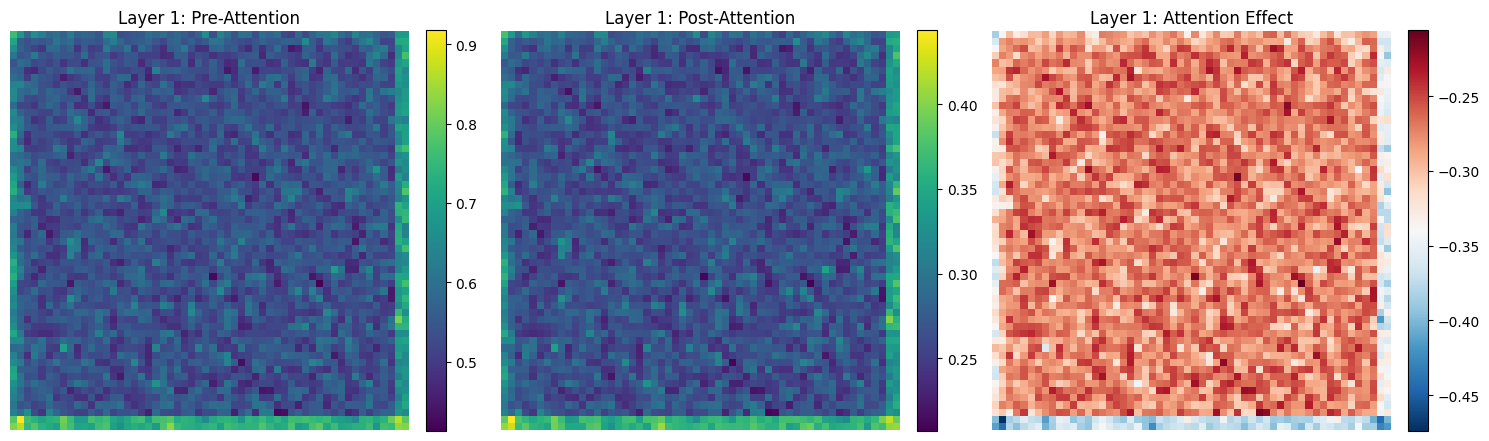

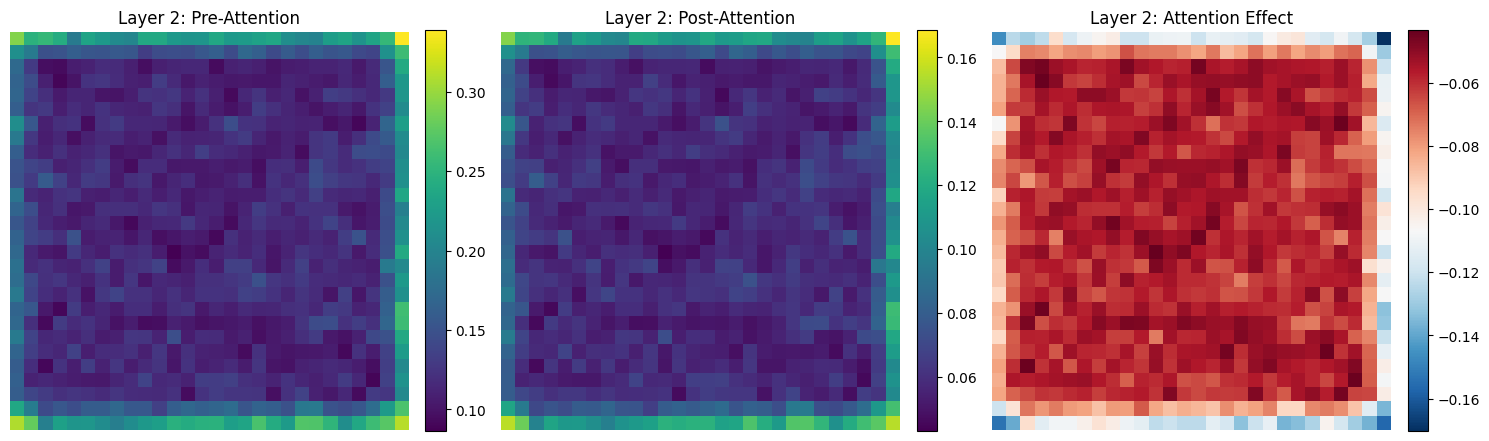

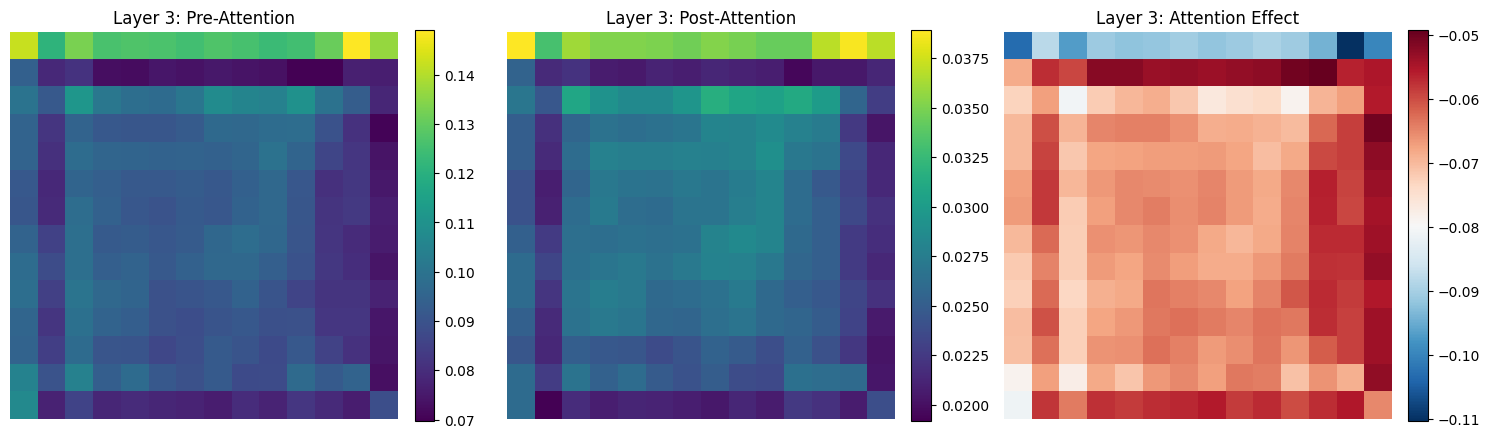

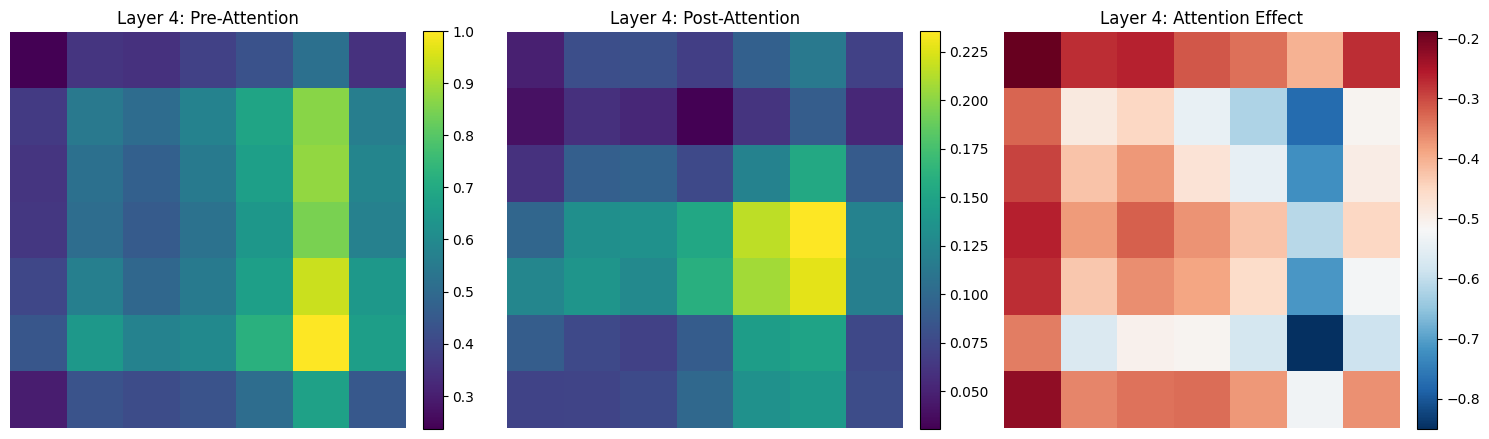

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Usage example
if __name__ == "__main__":
    # Create model
    model = DSAN(num_classes=7)
    print(f"Model created with {count_parameters(model):,} trainable parameters")

    # Test forward pass
    dummy_input = torch.randn(1, 3, 224, 224)
    output = model(dummy_input)
    print(f"Output shape: {output.shape}")

    # Test attention visualization
    visualizations = model.visualize_attention(dummy_input)
    print(f"Generated {len(visualizations)} attention visualizations")

In [20]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import albumentations as A
import torchvision.models as models
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Face Preprocessing Utility
# --------------------------
def preprocess_dataset_faces(dataset_name, root_dir, output_dir, phase='train', batch_size=32):
    """
    Preprocess dataset by detecting faces and saving them to disk
    This should be run once before training to speed up data loading

    Args:
        dataset_name (str): Name of dataset (ferplus, fer2013, raf-db)
        root_dir (str): Root directory of datasets
        output_dir (str): Directory to save processed faces
        phase (str): train, test, or val
        batch_size (int): Batch size for processing
    """
    # Map standard dataset names to directory names
    dataset_dir_map = {
        'raf-db': 'rafdb',
        'ferplus': 'ferplus',
        'fer2013': 'fer2013'
    }

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Initialize MTCNN for face detection
    mtcnn = MTCNN(
        keep_all=False,  # Only keep the largest face
        device=device,
        select_largest=True,  # Select largest face
        post_process=False,  # Don't normalize
        image_size=224  # Output size
    )

    # Get actual dataset directory
    actual_dir = dataset_dir_map.get(dataset_name, dataset_name)
    base_path = os.path.join(root_dir, actual_dir)

    # Get image paths and labels
    image_paths = []
    labels = []

    # Special case for RAF-DB
    if dataset_name.lower() == 'raf-db':
        images_dir = os.path.join(base_path, 'DATASET', phase)
        label_file = os.path.join(base_path, f'EmoLabel/list_{phase}.txt')

        if not os.path.exists(label_file):
            print(f"RAF-DB label file not found at {label_file}")
            return

        # Load labels
        try:
            labels_df = pd.read_csv(label_file, sep=' ', header=None, names=['image', 'label'])
            # RAF-DB uses 1-7 for labels, convert to 0-6
            labels_df['label'] = labels_df['label'] - 1

            for idx, row in labels_df.iterrows():
                img_path = os.path.join(images_dir, row['image'])
                if os.path.exists(img_path):
                    image_paths.append(img_path)
                    labels.append(int(row['label']))
                else:
                    print(f"Warning: Image {img_path} not found")
        except Exception as e:
            print(f"Error loading RAF-DB: {str(e)}")
            return
    else:
        # Standard emotion folder structure
        phase_path = os.path.join(base_path, phase)
        if not os.path.exists(phase_path):
            print(f"Phase path {phase_path} does not exist!")
            return

        # Emotion mapping
        emotion_map = {
            'neutral': 0,
            'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3, 'suprise': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Loop through emotion folders
        for emotion_dir in os.listdir(phase_path):
            full_path = os.path.join(phase_path, emotion_dir)
            if not os.path.isdir(full_path):
                continue

            emotion = emotion_map.get(emotion_dir.lower())
            if emotion is None:
                print(f"Warning: Unknown emotion folder '{emotion_dir}' in {phase_path}")
                continue

            for img_file in os.listdir(full_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(full_path, img_file))
                    labels.append(emotion)

    print(f"Found {len(image_paths)} images in {dataset_name}")

    # Create metadata file
    metadata = {
        'dataset': dataset_name,
        'phase': phase,
        'image_paths': image_paths,
        'labels': labels,
        'processed_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    # Save metadata
    metadata_file = os.path.join(output_dir, f"{dataset_name}_{phase}_metadata.pkl")
    with open(metadata_file, 'wb') as f:
        pickle.dump(metadata, f)

    # Process images in batches
    num_batches = len(image_paths) // batch_size + (1 if len(image_paths) % batch_size > 0 else 0)

    processed_count = 0
    skipped_count = 0

    for batch_idx in tqdm(range(num_batches), desc=f"Processing {dataset_name}"):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(image_paths))

        batch_paths = image_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Load images
        batch_images = []
        valid_indices = []

        for i, img_path in enumerate(batch_paths):
            try:
                img = Image.open(img_path).convert('RGB')
                batch_images.append(img)
                valid_indices.append(i)
            except Exception as e:
                print(f"Error loading {img_path}: {str(e)}")
                skipped_count += 1

        if not batch_images:
            continue

        # Detect faces
        try:
            batch_faces = mtcnn(batch_images)

            # Save detected faces
            for i, (face, idx) in enumerate(zip(batch_faces, valid_indices)):
                if face is None:
                    skipped_count += 1
                    continue

                # Convert to numpy array and save
                face_np = face.permute(1, 2, 0).cpu().numpy()
                face_np = (face_np * 255).astype(np.uint8)

                # Create output filename
                img_id = f"{dataset_name}_{phase}_{start_idx + idx}"
                output_file = os.path.join(output_dir, f"{img_id}.npy")

                # Save face and label
                np.save(output_file, {
                    'face': face_np,
                    'label': batch_labels[idx],
                    'original_path': batch_paths[idx]
                })

                processed_count += 1

        except Exception as e:
            print(f"Error in batch {batch_idx}: {str(e)}")
            skipped_count += len(batch_images)

    print(f"Preprocessing complete for {dataset_name}:")
    print(f"  - Processed: {processed_count} images")
    print(f"  - Skipped: {skipped_count} images")
    print(f"  - Total: {len(image_paths)} images")
    print(f"  - Success rate: {processed_count / len(image_paths) * 100:.2f}%")

# --------------------------
# 3. Optimized Dataset Class
# --------------------------
class FastDSANDataset(Dataset):
    """
    Optimized dataset class that loads preprocessed face images
    """
    def __init__(self, dataset_name, root_dir, processed_dir, phase='train', max_samples=None,
                 use_cache=True, cache_size=1000):
        self.dataset_name = dataset_name.lower()
        self.phase = phase
        self.use_cache = use_cache
        self.cache_size = cache_size
        self.max_samples = max_samples

        # Create augmentation transform with correct parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            # Use newer CoarseDropout with correct parameters
            A.OneOf([
                A.CoarseDropout(
                    max_holes=8,
                    max_height=16,
                    max_width=16,
                    min_holes=1,
                    min_height=8,
                    min_width=8,
                    fill_value=0,
                    p=0.5
                ),
                A.GridDropout(
                    ratio=0.1,
                    p=0.5
                )
            ], p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Load dataset metadata
        metadata_file = os.path.join(processed_dir, f"{dataset_name}_{phase}_metadata.pkl")

        if not os.path.exists(metadata_file):
            # If metadata doesn't exist, create it by preprocessing
            print(f"Metadata not found for {dataset_name}. Running preprocessing...")
            preprocess_dataset_faces(dataset_name, root_dir, processed_dir, phase)

            # Check again
            if not os.path.exists(metadata_file):
                raise ValueError(f"Failed to create metadata for {dataset_name}")

        # Load metadata
        with open(metadata_file, 'rb') as f:
            metadata = pickle.load(f)

        self.image_paths = metadata['image_paths']
        self.labels = metadata['labels']
        self.processed_dir = processed_dir

        # Limit dataset size if requested
        if max_samples and len(self.image_paths) > max_samples:
            self.image_paths = self.image_paths[:max_samples]
            self.labels = self.labels[:max_samples]
            print(f"Limited {dataset_name} to {max_samples} samples")

        # Initialize cache
        self.cache = {}

        print(f"Loaded {dataset_name} with {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Check cache first
        if self.use_cache and idx in self.cache:
            return self.cache[idx]

        try:
            # Create face image ID
            img_id = f"{self.dataset_name}_{self.phase}_{idx}"
            face_file = os.path.join(self.processed_dir, f"{img_id}.npy")

            # If preprocessed face exists, load it
            if os.path.exists(face_file):
                data = np.load(face_file, allow_pickle=True).item()
                face = data['face']
                label = data['label']
            else:
                # Fallback to original image and process on-the-fly
                img_path = self.image_paths[idx]
                img = Image.open(img_path).convert('RGB')

                # Use MTCNN to detect face
                mtcnn = MTCNN(keep_all=False, device='cpu')
                face = mtcnn(img)

                if face is None:
                    raise RuntimeError("No face detected")

                # Convert to numpy
                face = face.permute(1, 2, 0).cpu().numpy()
                face = (face * 255).astype(np.uint8)
                label = self.labels[idx]

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            # Convert to tensor
            img_tensor = torch.from_numpy(augmented).permute(2, 0, 1).float()
            label_tensor = torch.tensor(label, dtype=torch.long)

            # Store in cache if using cache
            if self.use_cache:
                self.cache[idx] = (img_tensor, label_tensor)

                # Limit cache size
                if len(self.cache) > self.cache_size:
                    # Remove random item (simple LRU implementation)
                    remove_idx = list(self.cache.keys())[0]
                    del self.cache[remove_idx]

            return img_tensor, label_tensor

        except Exception as e:
            print(f"Error processing idx {idx}, path: {self.image_paths[idx] if idx < len(self.image_paths) else 'unknown'}: {str(e)}")
            # Return dummy tensors with error flag (-1)
            return torch.zeros((3, 224, 224)), torch.tensor(-1)

# --------------------------
# 4. Model Architecture
# --------------------------
class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone() if self.training else x
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        if self.training:
            self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone() if self.training else x
        x = self.gfe_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone() if self.training else x
        x = self.mff_attention1(x)
        if self.training:
            self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone() if self.training else x
        x = self.mff_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """Generate attention visualizations for a given input image"""
        # Ensure model is in eval mode
        was_training = self.training
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            # Restore training state
            if was_training:
                self.train()

            return visualizations

# --------------------------
# 5. Training Utilities
# --------------------------
def train_epoch(model, train_loader, criterion, optimizer, scaler, epoch, device):
    """Train model for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}")

    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        # Filter out invalid samples
        valid_mask = targets != -1
        if not valid_mask.any():
            continue

        inputs = inputs[valid_mask].to(device)
        targets = targets[valid_mask].to(device)

        optimizer.zero_grad()

        # Use mixed precision for faster training
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        # Scale gradients and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar
        progress_bar.set_postfix({
            'loss': running_loss / (batch_idx + 1),
            'acc': 100. * correct / total if total > 0 else 0
        })

    return running_loss / len(train_loader), 100. * correct / total

def validate(model, val_loader, criterion, device):
    """Validate model on validation set"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            # Filter out invalid samples
            valid_mask = targets != -1
            if not valid_mask.any():
                continue

            inputs = inputs[valid_mask].to(device)
            targets = targets[valid_mask].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return running_loss / len(val_loader), 100. * correct / total

# --------------------------
# 6. Main Training Script
# --------------------------
def main():
    # Configuration
    batch_size = 64
    max_samples = 10000  # Limit samples for faster experimentation
    num_epochs = 10
    learning_rate = 0.001
    weight_decay = 1e-4

    # Directories
    data_dir = "data"
    processed_dir = "data_processed"
    os.makedirs(processed_dir, exist_ok=True)

    # Create datasets
    print("\nInitializing datasets:")
    datasets_train = []
    datasets_val = []

    # Try to load each dataset, but don't fail if one is missing
    try:
        datasets_train.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                       phase='validation', max_samples=max_samples//5))
        print("Successfully loaded FERPlus")
    except Exception as e:
        print(f"Error loading FERPlus: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # FER2013 uses 'test' instead of 'validation'
        print("Successfully loaded FER2013")
    except Exception as e:
        print(f"Error loading FER2013: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # RAF-DB uses 'test' instead of 'validation'
        print("Successfully loaded RAF-DB")
    except Exception as e:
        print(f"Error loading RAF-DB: {str(e)}")

    if not datasets_train:
        raise ValueError("No datasets could be loaded successfully")

    # Create data loaders
    train_dataset = torch.utils.data.ConcatDataset(datasets_train)
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,  # Increase for better performance if your system allows
        pin_memory=True,
        drop_last=False
    )

    if datasets_val:
        val_dataset = torch.utils.data.ConcatDataset(datasets_val)
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=2,
            pin_memory=True,
            drop_last=False
        )
    else:
        val_loader = None

    print(f"Training dataset size: {len(train_dataset)}")
    if val_loader:
        print(f"Validation dataset size: {len(val_dataset)}")

    # Create model
    print("\nInitializing DSAN model:")
    model = DSAN(num_classes=8).to(device)  # 8 classes including contempt
    print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    # Train model
    print("\nStarting training:")
    best_acc = 0.0
    start_time = datetime.now()

    # Test batch loading time
    print("Testing batch loading time...")
    test_start = datetime.now()
    for i, (inputs, targets) in enumerate(train_loader):
        if i == 0:
            print(f"First batch shape: {inputs.shape}")
            print(f"Valid samples: {sum(targets != -1).item()}/{len(targets)}")
            print(f"Time to load first batch: {datetime.now() - test_start}")
        if i >= 2:
            break

    # Training loop
    try:
        for epoch in range(1, num_epochs + 1):
            epoch_start = datetime.now()

            train_loss, train_acc = train_epoch(
                model, train_loader, criterion, optimizer, scaler, epoch, device
            )

            epoch_time = datetime.now() - epoch_start
            print(f"Epoch {epoch} completed in {epoch_time}. Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

            if val_loader:
                val_loss, val_acc = validate(model, val_loader, criterion, device)
                print(f"Validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

                # Update learning rate
                scheduler.step(val_loss)

                # Save best model
                if val_acc > best_acc:
                    best_acc = val_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with accuracy: {best_acc:.2f}%")
            else:
                # Save based on training accuracy if no validation set
                if train_acc > best_acc:
                    best_acc = train_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with training accuracy: {best_acc:.2f}%")

            # Save checkpoint every epoch
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'train_loss': train_loss,
                'train_acc': train_acc,
                'best_acc': best_acc
            }, "dsan_checkpoint.pth")

    except KeyboardInterrupt:
        print("Training interrupted by user. Saving current model...")
        torch.save(model.state_dict(), "dsan_interrupted.pth")


    # Calculate total training time
    total_time = datetime.now() - start_time
    print(f"\nTraining completed in {total_time}")
    print(f"Best accuracy: {best_acc:.2f}%")

    # Test model with a sample image (visualization demo)
    if val_loader is not None:
        print("\nGenerating attention visualization example...")
        try:
            # Get a batch from validation set
            sample_batch, sample_targets = next(iter(val_loader))

            # Find a valid sample (not error flag)
            valid_idx = torch.where(sample_targets != -1)[0]
            if len(valid_idx) > 0:
                sample_idx = valid_idx[0].item()
                sample_img = sample_batch[sample_idx:sample_idx+1].to(device)
                sample_label = sample_targets[sample_idx].item()

                # Generate attention visualizations
                attention_figs = model.visualize_attention(sample_img)

                # Save visualizations
                for i, fig in enumerate(attention_figs):
                    fig.savefig(f"attention_layer_{i+1}.png")
                    plt.close(fig)

                print(f"Attention visualizations saved for sample with emotion label: {sample_label}")
            else:
                print("No valid samples found for visualization")

        except Exception as e:
            print(f"Error generating visualization: {str(e)}")

    print("\nTraining summary:")
    print(f"- Total epochs: {epoch}")
    print(f"- Best accuracy: {best_acc:.2f}%")
    print(f"- Total training time: {total_time}")
    print(f"- Model saved to: dsan_best.pth")

    # Load best model for final evaluation
    try:
        best_model = DSAN(num_classes=8).to(device)
        best_model.load_state_dict(torch.load("dsan_best.pth"))

        if val_loader:
            print("\nEvaluating best model on validation set:")
            val_loss, val_acc = validate(best_model, val_loader, criterion, device)
            print(f"Final validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

            # Generate confusion matrix
            print("\nGenerating confusion matrix...")
            best_model.eval()
            all_preds = []
            all_targets = []

            with torch.no_grad():
                for inputs, targets in val_loader:
                    # Filter out invalid samples
                    valid_mask = targets != -1
                    if not valid_mask.any():
                        continue

                    inputs = inputs[valid_mask].to(device)
                    targets = targets[valid_mask].cpu().numpy()

                    outputs = best_model(inputs)
                    _, preds = outputs.max(1)

                    all_preds.extend(preds.cpu().numpy())
                    all_targets.extend(targets)

            if all_preds and all_targets:
                # Get class names for the confusion matrix
                emotion_classes = ['neutral', 'happiness', 'sadness', 'surprise',
                                 'fear', 'disgust', 'anger', 'contempt']

                # Plot confusion matrix
                try:
                    from sklearn.metrics import confusion_matrix, classification_report
                    import seaborn as sns

                    cm = confusion_matrix(all_targets, all_preds)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                              xticklabels=emotion_classes, yticklabels=emotion_classes)
                    plt.xlabel('Predicted')
                    plt.ylabel('True')
                    plt.title('Confusion Matrix')
                    plt.savefig('confusion_matrix.png')
                    plt.close()

                    # Print classification report
                    print("\nClassification Report:")
                    print(classification_report(all_targets, all_preds,
                                              target_names=emotion_classes))
                except Exception as e:
                    print(f"Error generating confusion matrix: {str(e)}")
            else:
                print("Not enough valid samples to generate confusion matrix")
    except Exception as e:
        print(f"Error evaluating best model: {str(e)}")

    print("\nDSAN training and evaluation complete!")


if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        import traceback
        traceback.print_exc()

Using device: cuda

Initializing datasets:
Metadata not found for ferplus. Running preprocessing...


<ipython-input-20-a2feb8381064>:229: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Found 66379 images in ferplus


Processing ferplus:   0%|          | 0/2075 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/facenet_pytorch/models/mtcnn.py:444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_boxes = np.array(selected_boxes)
/usr/local/lib/python3.11/dist-packages/facenet_pytorch/models/mtcnn.py:446: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_points = np.array(selected_points)
Processing ferplus: 100%|██████████| 2075/2075 [06:01<00:00,  5.75it/s]


Preprocessing complete for ferplus:
  - Processed: 59160 images
  - Skipped: 7219 images
  - Total: 66379 images
  - Success rate: 89.12%
Limited ferplus to 10000 samples
Loaded ferplus with 10000 samples
Metadata not found for ferplus. Running preprocessing...
Found 8341 images in ferplus


Processing ferplus: 100%|██████████| 261/261 [00:44<00:00,  5.85it/s]


Preprocessing complete for ferplus:
  - Processed: 7453 images
  - Skipped: 888 images
  - Total: 8341 images
  - Success rate: 89.35%
Limited ferplus to 2000 samples
Loaded ferplus with 2000 samples
Successfully loaded FERPlus
Metadata not found for fer2013. Running preprocessing...
Found 28709 images in fer2013


Processing fer2013:  24%|██▍       | 217/898 [00:30<01:36,  7.09it/s]


KeyboardInterrupt: 

In [ ]:
!find data/ -maxdepth 3 -type d

find: ‘data/’: No such file or directory


In [ ]:
ls


sample_data/


In [ ]:
cd

/root


In [ ]:
ls


In [ ]:
cd root

[Errno 2] No such file or directory: 'root'
/root


In [ ]:
ls


In [ ]:
ls

In [ ]:
!nvidia-smi  # Verify GPU allocation
!python --version  # Python 3.10+

/bin/bash: line 1: nvidia-smi: command not found
Python 3.11.12


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import albumentations as A
import torchvision.models as models
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Face Preprocessing Utility
# --------------------------
def preprocess_dataset_faces(dataset_name, root_dir, output_dir, phase='train', batch_size=32):
    """
    Preprocess dataset by detecting faces and saving them to disk
    This should be run once before training to speed up data loading

    Args:
        dataset_name (str): Name of dataset (ferplus, fer2013, raf-db)
        root_dir (str): Root directory of datasets
        output_dir (str): Directory to save processed faces
        phase (str): train, test, or val
        batch_size (int): Batch size for processing
    """
    # Map standard dataset names to directory names
    dataset_dir_map = {
        'raf-db': 'rafdb',
        'ferplus': 'ferplus',
        'fer2013': 'fer2013'
    }

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Initialize MTCNN for face detection
    mtcnn = MTCNN(
        keep_all=False,  # Only keep the largest face
        device=device,
        select_largest=True,  # Select largest face
        post_process=False,  # Don't normalize
        image_size=224  # Output size
    )

    # Get actual dataset directory
    actual_dir = dataset_dir_map.get(dataset_name, dataset_name)
    base_path = os.path.join(root_dir, actual_dir)

    # Get image paths and labels
    image_paths = []
    labels = []

    # Special case for RAF-DB
    if dataset_name.lower() == 'raf-db':
        images_dir = os.path.join(base_path, 'DATASET', phase)
        label_file = os.path.join(base_path, f'EmoLabel/list_{phase}.txt')

        if not os.path.exists(label_file):
            print(f"RAF-DB label file not found at {label_file}")
            return

        # Load labels
        try:
            labels_df = pd.read_csv(label_file, sep=' ', header=None, names=['image', 'label'])
            # RAF-DB uses 1-7 for labels, convert to 0-6
            labels_df['label'] = labels_df['label'] - 1

            for idx, row in labels_df.iterrows():
                img_path = os.path.join(images_dir, row['image'])
                if os.path.exists(img_path):
                    image_paths.append(img_path)
                    labels.append(int(row['label']))
                else:
                    print(f"Warning: Image {img_path} not found")
        except Exception as e:
            print(f"Error loading RAF-DB: {str(e)}")
            return
    else:
        # Standard emotion folder structure
        phase_path = os.path.join(base_path, phase)
        if not os.path.exists(phase_path):
            print(f"Phase path {phase_path} does not exist!")
            return

        # Emotion mapping
        emotion_map = {
            'neutral': 0,
            'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3, 'suprise': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Loop through emotion folders
        for emotion_dir in os.listdir(phase_path):
            full_path = os.path.join(phase_path, emotion_dir)
            if not os.path.isdir(full_path):
                continue

            emotion = emotion_map.get(emotion_dir.lower())
            if emotion is None:
                print(f"Warning: Unknown emotion folder '{emotion_dir}' in {phase_path}")
                continue

            for img_file in os.listdir(full_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(full_path, img_file))
                    labels.append(emotion)

    print(f"Found {len(image_paths)} images in {dataset_name}")

    # Create metadata file
    metadata = {
        'dataset': dataset_name,
        'phase': phase,
        'image_paths': image_paths,
        'labels': labels,
        'processed_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    # Save metadata
    metadata_file = os.path.join(output_dir, f"{dataset_name}_{phase}_metadata.pkl")
    with open(metadata_file, 'wb') as f:
        pickle.dump(metadata, f)

    # Process images in batches
    num_batches = len(image_paths) // batch_size + (1 if len(image_paths) % batch_size > 0 else 0)

    processed_count = 0
    skipped_count = 0

    for batch_idx in tqdm(range(num_batches), desc=f"Processing {dataset_name}"):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(image_paths))

        batch_paths = image_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Load images
        batch_images = []
        valid_indices = []

        for i, img_path in enumerate(batch_paths):
            try:
                img = Image.open(img_path).convert('RGB')
                batch_images.append(img)
                valid_indices.append(i)
            except Exception as e:
                print(f"Error loading {img_path}: {str(e)}")
                skipped_count += 1

        if not batch_images:
            continue

        # Detect faces
        try:
            batch_faces = mtcnn(batch_images)

            # Save detected faces
            for i, (face, idx) in enumerate(zip(batch_faces, valid_indices)):
                if face is None:
                    skipped_count += 1
                    continue

                # Convert to numpy array and save
                face_np = face.permute(1, 2, 0).cpu().numpy()
                face_np = (face_np * 255).astype(np.uint8)

                # Create output filename
                img_id = f"{dataset_name}_{phase}_{start_idx + idx}"
                output_file = os.path.join(output_dir, f"{img_id}.npy")

                # Save face and label
                np.save(output_file, {
                    'face': face_np,
                    'label': batch_labels[idx],
                    'original_path': batch_paths[idx]
                })

                processed_count += 1

        except Exception as e:
            print(f"Error in batch {batch_idx}: {str(e)}")
            skipped_count += len(batch_images)

    print(f"Preprocessing complete for {dataset_name}:")
    print(f"  - Processed: {processed_count} images")
    print(f"  - Skipped: {skipped_count} images")
    print(f"  - Total: {len(image_paths)} images")
    print(f"  - Success rate: {processed_count / len(image_paths) * 100:.2f}%")

# --------------------------
# 3. Optimized Dataset Class
# --------------------------
class FastDSANDataset(Dataset):
    """
    Optimized dataset class that loads preprocessed face images
    """
    def __init__(self, dataset_name, root_dir, processed_dir, phase='train', max_samples=None,
                 use_cache=True, cache_size=1000):
        self.dataset_name = dataset_name.lower()
        self.phase = phase
        self.use_cache = use_cache
        self.cache_size = cache_size
        self.max_samples = max_samples

        # Create augmentation transform with correct parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            # Use newer CoarseDropout with correct parameters
            A.OneOf([
                A.CoarseDropout(
                    max_holes=8,
                    max_height=16,
                    max_width=16,
                    min_holes=1,
                    min_height=8,
                    min_width=8,
                    fill_value=0,
                    p=0.5
                ),
                A.GridDropout(
                    ratio=0.1,
                    p=0.5
                )
            ], p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Load dataset metadata
        metadata_file = os.path.join(processed_dir, f"{dataset_name}_{phase}_metadata.pkl")

        if not os.path.exists(metadata_file):
            # If metadata doesn't exist, create it by preprocessing
            print(f"Metadata not found for {dataset_name}. Running preprocessing...")
            preprocess_dataset_faces(dataset_name, root_dir, processed_dir, phase)

            # Check again
            if not os.path.exists(metadata_file):
                raise ValueError(f"Failed to create metadata for {dataset_name}")

        # Load metadata
        with open(metadata_file, 'rb') as f:
            metadata = pickle.load(f)

        self.image_paths = metadata['image_paths']
        self.labels = metadata['labels']
        self.processed_dir = processed_dir

        # Limit dataset size if requested
        if max_samples and len(self.image_paths) > max_samples:
            self.image_paths = self.image_paths[:max_samples]
            self.labels = self.labels[:max_samples]
            print(f"Limited {dataset_name} to {max_samples} samples")

        # Initialize cache
        self.cache = {}

        print(f"Loaded {dataset_name} with {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Check cache first
        if self.use_cache and idx in self.cache:
            return self.cache[idx]

        try:
            # Create face image ID
            img_id = f"{self.dataset_name}_{self.phase}_{idx}"
            face_file = os.path.join(self.processed_dir, f"{img_id}.npy")

            # If preprocessed face exists, load it
            if os.path.exists(face_file):
                data = np.load(face_file, allow_pickle=True).item()
                face = data['face']
                label = data['label']
            else:
                # Fallback to original image and process on-the-fly
                img_path = self.image_paths[idx]
                img = Image.open(img_path).convert('RGB')

                # Use MTCNN to detect face
                mtcnn = MTCNN(keep_all=False, device='cpu')
                face = mtcnn(img)

                if face is None:
                    raise RuntimeError("No face detected")

                # Convert to numpy
                face = face.permute(1, 2, 0).cpu().numpy()
                face = (face * 255).astype(np.uint8)
                label = self.labels[idx]

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            # Convert to tensor
            img_tensor = torch.from_numpy(augmented).permute(2, 0, 1).float()
            label_tensor = torch.tensor(label, dtype=torch.long)

            # Store in cache if using cache
            if self.use_cache:
                self.cache[idx] = (img_tensor, label_tensor)

                # Limit cache size
                if len(self.cache) > self.cache_size:
                    # Remove random item (simple LRU implementation)
                    remove_idx = list(self.cache.keys())[0]
                    del self.cache[remove_idx]

            return img_tensor, label_tensor

        except Exception as e:
            print(f"Error processing idx {idx}, path: {self.image_paths[idx] if idx < len(self.image_paths) else 'unknown'}: {str(e)}")
            # Return dummy tensors with error flag (-1)
            return torch.zeros((3, 224, 224)), torch.tensor(-1)

# --------------------------
# 4. Model Architecture
# --------------------------
class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone() if self.training else x
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        if self.training:
            self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone() if self.training else x
        x = self.gfe_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone() if self.training else x
        x = self.mff_attention1(x)
        if self.training:
            self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone() if self.training else x
        x = self.mff_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """Generate attention visualizations for a given input image"""
        # Ensure model is in eval mode
        was_training = self.training
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            # Restore training state
            if was_training:
                self.train()

            return visualizations

# --------------------------
# 5. Training Utilities
# --------------------------
def train_epoch(model, train_loader, criterion, optimizer, scaler, epoch, device):
    """Train model for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}")

    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        # Filter out invalid samples
        valid_mask = targets != -1
        if not valid_mask.any():
            continue

        inputs = inputs[valid_mask].to(device)
        targets = targets[valid_mask].to(device)

        optimizer.zero_grad()

        # Use mixed precision for faster training
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        # Scale gradients and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar
        progress_bar.set_postfix({
            'loss': running_loss / (batch_idx + 1),
            'acc': 100. * correct / total if total > 0 else 0
        })

    return running_loss / len(train_loader), 100. * correct / total

def validate(model, val_loader, criterion, device):
    """Validate model on validation set"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            # Filter out invalid samples
            valid_mask = targets != -1
            if not valid_mask.any():
                continue

            inputs = inputs[valid_mask].to(device)
            targets = targets[valid_mask].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return running_loss / len(val_loader), 100. * correct / total

# --------------------------
# 6. Main Training Script
# --------------------------
def main():
    # Configuration
    batch_size = 64
    max_samples = 10000  # Limit samples for faster experimentation
    num_epochs = 10
    learning_rate = 0.001
    weight_decay = 1e-4

    # Directories
    data_dir = "data"
    processed_dir = "data_processed"
    os.makedirs(processed_dir, exist_ok=True)

    # Create datasets
    print("\nInitializing datasets:")
    datasets_train = []
    datasets_val = []

    # Try to load each dataset, but don't fail if one is missing
    try:
        datasets_train.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                       phase='validation', max_samples=max_samples//5))
        print("Successfully loaded FERPlus")
    except Exception as e:
        print(f"Error loading FERPlus: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # FER2013 uses 'test' instead of 'validation'
        print("Successfully loaded FER2013")
    except Exception as e:
        print(f"Error loading FER2013: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # RAF-DB uses 'test' instead of 'validation'
        print("Successfully loaded RAF-DB")
    except Exception as e:
        print(f"Error loading RAF-DB: {str(e)}")

    if not datasets_train:
        raise ValueError("No datasets could be loaded successfully")

    # Create data loaders
    train_dataset = torch.utils.data.ConcatDataset(datasets_train)
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,  # Increase for better performance if your system allows
        pin_memory=True,
        drop_last=False
    )

    if datasets_val:
        val_dataset = torch.utils.data.ConcatDataset(datasets_val)
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=2,
            pin_memory=True,
            drop_last=False
        )
    else:
        val_loader = None

    print(f"Training dataset size: {len(train_dataset)}")
    if val_loader:
        print(f"Validation dataset size: {len(val_dataset)}")

    # Create model
    print("\nInitializing DSAN model:")
    model = DSAN(num_classes=8).to(device)  # 8 classes including contempt
    print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    # Train model
    print("\nStarting training:")
    best_acc = 0.0
    start_time = datetime.now()

    # Test batch loading time
    print("Testing batch loading time...")
    test_start = datetime.now()
    for i, (inputs, targets) in enumerate(train_loader):
        if i == 0:
            print(f"First batch shape: {inputs.shape}")
            print(f"Valid samples: {sum(targets != -1).item()}/{len(targets)}")
            print(f"Time to load first batch: {datetime.now() - test_start}")
        if i >= 2:
            break

    # Training loop
    try:
        for epoch in range(1, num_epochs + 1):
            epoch_start = datetime.now()

            train_loss, train_acc = train_epoch(
                model, train_loader, criterion, optimizer, scaler, epoch, device
            )

            epoch_time = datetime.now() - epoch_start
            print(f"Epoch {epoch} completed in {epoch_time}. Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

            if val_loader:
                val_loss, val_acc = validate(model, val_loader, criterion, device)
                print(f"Validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

                # Update learning rate
                scheduler.step(val_loss)

                # Save best model
                if val_acc > best_acc:
                    best_acc = val_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with accuracy: {best_acc:.2f}%")
            else:
                # Save based on training accuracy if no validation set
                if train_acc > best_acc:
                    best_acc = train_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with training accuracy: {best_acc:.2f}%")

            # Save checkpoint every epoch
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'train_loss': train_loss,
                'train_acc': train_acc,
                'best_acc': best_acc
            }, "dsan_checkpoint.pth")

    except KeyboardInterrupt:
        print("Training interrupted by user. Saving current model...")
        torch.save(model.state_dict(), "dsan_interrupted.pth")


    # Calculate total training time
    total_time = datetime.now() - start_time
    print(f"\nTraining completed in {total_time}")
    print(f"Best accuracy: {best_acc:.2f}%")

    # Test model with a sample image (visualization demo)
    if val_loader is not None:
        print("\nGenerating attention visualization example...")
        try:
            # Get a batch from validation set
            sample_batch, sample_targets = next(iter(val_loader))

            # Find a valid sample (not error flag)
            valid_idx = torch.where(sample_targets != -1)[0]
            if len(valid_idx) > 0:
                sample_idx = valid_idx[0].item()
                sample_img = sample_batch[sample_idx:sample_idx+1].to(device)
                sample_label = sample_targets[sample_idx].item()

                # Generate attention visualizations
                attention_figs = model.visualize_attention(sample_img)

                # Save visualizations
                for i, fig in enumerate(attention_figs):
                    fig.savefig(f"attention_layer_{i+1}.png")
                    plt.close(fig)

                print(f"Attention visualizations saved for sample with emotion label: {sample_label}")
            else:
                print("No valid samples found for visualization")

        except Exception as e:
            print(f"Error generating visualization: {str(e)}")

    print("\nTraining summary:")
    print(f"- Total epochs: {epoch}")
    print(f"- Best accuracy: {best_acc:.2f}%")
    print(f"- Total training time: {total_time}")
    print(f"- Model saved to: dsan_best.pth")

    # Load best model for final evaluation
    try:
        best_model = DSAN(num_classes=8).to(device)
        best_model.load_state_dict(torch.load("dsan_best.pth"))

        if val_loader:
            print("\nEvaluating best model on validation set:")
            val_loss, val_acc = validate(best_model, val_loader, criterion, device)
            print(f"Final validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

            # Generate confusion matrix
            print("\nGenerating confusion matrix...")
            best_model.eval()
            all_preds = []
            all_targets = []

            with torch.no_grad():
                for inputs, targets in val_loader:
                    # Filter out invalid samples
                    valid_mask = targets != -1
                    if not valid_mask.any():
                        continue

                    inputs = inputs[valid_mask].to(device)
                    targets = targets[valid_mask].cpu().numpy()

                    outputs = best_model(inputs)
                    _, preds = outputs.max(1)

                    all_preds.extend(preds.cpu().numpy())
                    all_targets.extend(targets)

            if all_preds and all_targets:
                # Get class names for the confusion matrix
                emotion_classes = ['neutral', 'happiness', 'sadness', 'surprise',
                                 'fear', 'disgust', 'anger', 'contempt']

                # Plot confusion matrix
                try:
                    from sklearn.metrics import confusion_matrix, classification_report
                    import seaborn as sns

                    cm = confusion_matrix(all_targets, all_preds)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                              xticklabels=emotion_classes, yticklabels=emotion_classes)
                    plt.xlabel('Predicted')
                    plt.ylabel('True')
                    plt.title('Confusion Matrix')
                    plt.savefig('confusion_matrix.png')
                    plt.close()

                    # Print classification report
                    print("\nClassification Report:")
                    print(classification_report(all_targets, all_preds,
                                              target_names=emotion_classes))
                except Exception as e:
                    print(f"Error generating confusion matrix: {str(e)}")
            else:
                print("Not enough valid samples to generate confusion matrix")
    except Exception as e:
        print(f"Error evaluating best model: {str(e)}")

    print("\nDSAN training and evaluation complete!")


if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        import traceback
        traceback.print_exc()

ModuleNotFoundError: No module named 'facenet_pytorch'

In [ ]:
ls

sample_data/


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


class RAFDBDataset(Dataset):
    """
    RAF-DB dataset loader

    The RAF-DB dataset contains 7 emotion categories:
    0: Surprise, 1: Fear, 2: Disgust, 3: Happiness, 4: Sadness, 5: Anger, 6: Neutral
    """
    def __init__(self, root_dir, list_file, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            list_file (string): Path to the list file with image names and labels.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform

        # Load list file with image names and labels
        self.samples = []
        with open(list_file, 'r') as f:
            for line in f:
                line = line.strip()
                if line:  # Skip empty lines
                    img_name, label = line.split(' ')
                    # RAF-DB labels are typically 1-indexed, convert to 0-indexed
                    self.samples.append((img_name, int(label) - 1))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_name, label = self.samples[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def test_model(model, test_loader, device):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Calculate per-class accuracy
    print('\nPer-class accuracy:')
    for i in range(7):
        class_acc = 100 * class_correct[i] / max(class_total[i], 1)
        print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

    # Calculate F1 score for each class
    print('\nPer-class F1 scores:')
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)
        print(f'{emotion_labels[i]}: {f1:.4f}')

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)
    print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix


def visualize_confusion_matrix(confusion_matrix):
    """Visualize confusion matrix"""
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(emotion_labels))
    plt.xticks(tick_marks, emotion_labels, rotation=45)
    plt.yticks(tick_marks, emotion_labels)

    # Normalize confusion matrix
    cm_norm = confusion_matrix.numpy().astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, f'{confusion_matrix[i, j]:.0f}\n({cm_norm[i, j]:.2f})',
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt.gcf()


def visualize_sample_predictions(model, test_loader, device, num_samples=5):
    """Visualize sample predictions from the model"""
    model.eval()
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    # Get a batch of samples
    images, labels = next(iter(test_loader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        probs = F.softmax(outputs, dim=1)

    # Visualize each sample
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

    for i in range(num_samples):
        # Display image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        # Denormalize
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i, 0].imshow(img)
        true_label = emotion_labels[labels[i].item()]
        pred_label = emotion_labels[predicted[i].item()]
        color = 'green' if true_label == pred_label else 'red'
        axes[i, 0].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
        axes[i, 0].axis('off')

        # Display prediction probabilities
        probs_array = probs[i].cpu().numpy()
        axes[i, 1].barh(emotion_labels, probs_array)
        axes[i, 1].set_xlim(0, 1)
        axes[i, 1].set_title('Prediction Probabilities')

    plt.tight_layout()
    return fig


def main():
    """Main function to test the model on RAF-DB dataset"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Data transformations
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Path settings - adjust according to your RAF-DB dataset location
    raf_db_root = "./RAF-DB/basic/Image"  # Path to RAF-DB images
    raf_db_test_list = "./RAF-DB/basic/EmoLabel/list_patition_label.txt"  # Path to test list file

    # Create test dataset and dataloader
    test_dataset = RAFDBDataset(
        root_dir=raf_db_root,
        list_file=raf_db_test_list,
        transform=test_transform
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=32,
        shuffle=False,
        num_workers=4
    )

    print(f"Test dataset size: {len(test_dataset)}")

    # Create model
    model = DSAN(num_classes=7, pretrained=True)
    model = model.to(device)
    print(f"Model created with {count_parameters(model):,} trainable parameters")

    # Load pretrained weights if available
    model_path = "./dsan_model_rafdb.pth"
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path, map_location=device))
        print(f"Loaded pretrained model from {model_path}")
    else:
        print("No pretrained model found. Please train the model first.")
        return

    # Test the model
    accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

    # Visualize confusion matrix
    cm_fig = visualize_confusion_matrix(conf_matrix)
    cm_fig.savefig("confusion_matrix_rafdb.png")
    print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

    # Visualize sample predictions
    sample_fig = visualize_sample_predictions(model, test_loader, device)
    sample_fig.savefig("sample_predictions_rafdb.png")
    print("Saved sample predictions visualization to sample_predictions_rafdb.png")

    # Save evaluation results
    with open("evaluation_results_rafdb.txt", "w") as f:
        f.write(f"Test Accuracy: {accuracy:.2f}%\n")
        f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

    print("Evaluation completed!")


if __name__ == "__main__":
    main()

Using device: cuda


FileNotFoundError: [Errno 2] No such file or directory: './RAF-DB/basic/EmoLabel/list_patition_label.txt'

In [22]:
!find data/ -maxdepth 7 -type d

data/
data/ferplus
data/ferplus/validation
data/ferplus/validation/disgust
data/ferplus/validation/fear
data/ferplus/validation/contempt
data/ferplus/validation/angry
data/ferplus/validation/neutral
data/ferplus/validation/sad
data/ferplus/validation/happy
data/ferplus/validation/suprise
data/ferplus/test
data/ferplus/test/disgust
data/ferplus/test/fear
data/ferplus/test/contempt
data/ferplus/test/angry
data/ferplus/test/neutral
data/ferplus/test/sad
data/ferplus/test/happy
data/ferplus/test/suprise
data/ferplus/train
data/ferplus/train/disgust
data/ferplus/train/fear
data/ferplus/train/contempt
data/ferplus/train/angry
data/ferplus/train/neutral
data/ferplus/train/sad
data/ferplus/train/happy
data/ferplus/train/suprise
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/test/3
data/rafdb/DATASET/test/6
data/rafdb/DATASET/test/7
data/rafdb/DATASET/test/2
data/rafdb/DATASET/test/1
data/rafdb/DATASET/test/4
data/rafdb/DATASET/test/5
data/rafdb/DATASET/train
data/rafd

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


class RAFDBFolderDataset(Dataset):
    """
    RAF-DB dataset loader for folder-based structure

    The RAF-DB dataset contains 7 emotion categories mapped to folder numbers:
    1: Surprise, 2: Fear, 3: Disgust, 4: Happiness, 5: Sadness, 6: Anger, 7: Neutral
    """
    def __init__(self, root_dir, split='test', transform=None):
        """
        Args:
            root_dir (string): Root directory of the RAF-DB dataset.
            split (string): 'train' or 'test' split.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.samples = []

        # Class mapping based on RAF-DB folder numbering
        self.class_to_idx = {
            '1': 0,  # Surprise
            '2': 1,  # Fear
            '3': 2,  # Disgust
            '4': 3,  # Happiness
            '5': 4,  # Sadness
            '6': 5,  # Anger
            '7': 6,  # Neutral
        }

        # Load all samples from the directory structure
        for class_folder in sorted(os.listdir(self.root_dir)):
            class_path = os.path.join(self.root_dir, class_folder)
            if os.path.isdir(class_path) and class_folder in self.class_to_idx:
                class_idx = self.class_to_idx[class_folder]
                for img_file in os.listdir(class_path):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_path, img_file), class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def test_model(model, test_loader, device):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Calculate per-class accuracy
    print('\nPer-class accuracy:')
    for i in range(7):
        class_acc = 100 * class_correct[i] / max(class_total[i], 1)
        print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

    # Calculate F1 score for each class
    print('\nPer-class F1 scores:')
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)
        print(f'{emotion_labels[i]}: {f1:.4f}')

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)
    print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix


def visualize_confusion_matrix(confusion_matrix):
    """Visualize confusion matrix"""
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(emotion_labels))
    plt.xticks(tick_marks, emotion_labels, rotation=45)
    plt.yticks(tick_marks, emotion_labels)

    # Normalize confusion matrix
    cm_norm = confusion_matrix.numpy().astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, f'{confusion_matrix[i, j]:.0f}\n({cm_norm[i, j]:.2f})',
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt.gcf()


def visualize_sample_predictions(model, test_loader, device, num_samples=5):
    """Visualize sample predictions from the model"""
    model.eval()
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    # Get a batch of samples
    images, labels = next(iter(test_loader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        probs = F.softmax(outputs, dim=1)

    # Visualize each sample
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

    for i in range(num_samples):
        # Display image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        # Denormalize
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i, 0].imshow(img)
        true_label = emotion_labels[labels[i].item()]
        pred_label = emotion_labels[predicted[i].item()]
        color = 'green' if true_label == pred_label else 'red'
        axes[i, 0].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
        axes[i, 0].axis('off')

        # Display prediction probabilities
        probs_array = probs[i].cpu().numpy()
        axes[i, 1].barh(emotion_labels, probs_array)
        axes[i, 1].set_xlim(0, 1)
        axes[i, 1].set_title('Prediction Probabilities')

    plt.tight_layout()
    return fig


def visualize_attention_maps(model, test_loader, device, num_samples=3):
    """Visualize attention maps for sample images"""
    model.eval()

    # Get a batch of samples
    images, _ = next(iter(test_loader))
    images = images[:num_samples].to(device)

    all_visualizations = []

    for i in range(num_samples):
        single_img = images[i:i+1]  # Keep batch dimension
        visualizations = model.visualize_attention(single_img)
        all_visualizations.append(visualizations)

        # Save the visualizations
        for j, fig in enumerate(visualizations):
            fig.savefig(f"attention_map_sample{i+1}_layer{j+1}.png")

    print(f"Saved attention map visualizations for {num_samples} samples")
    return all_visualizations


def main():
    """Main function to test the model on RAF-DB dataset"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Data transformations
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Path settings for the updated directory structure
    raf_db_root = "./data/rafdb/DATASET"  # Path to the dataset root

    # Create test dataset and dataloader
    test_dataset = RAFDBFolderDataset(
        root_dir=raf_db_root,
        split='test',
        transform=test_transform
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=32,
        shuffle=False,
        num_workers=4
    )

    print(f"Test dataset size: {len(test_dataset)}")

    # Create model
    model = DSAN(num_classes=7, pretrained=True)
    model = model.to(device)
    print(f"Model created with {count_parameters(model):,} trainable parameters")

    # Load pretrained weights if available
    model_path = "./dsan_model_rafdb.pth"
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path, map_location=device))
        print(f"Loaded pretrained model from {model_path}")
    else:
        print("No pretrained model found. Please train the model first.")
        return

    # Test the model
    accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

    # Visualize confusion matrix
    cm_fig = visualize_confusion_matrix(conf_matrix)
    cm_fig.savefig("confusion_matrix_rafdb.png")
    print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

    # Visualize sample predictions
    sample_fig = visualize_sample_predictions(model, test_loader, device)
    sample_fig.savefig("sample_predictions_rafdb.png")
    print("Saved sample predictions visualization to sample_predictions_rafdb.png")

    # Visualize attention maps
    visualize_attention_maps(model, test_loader, device)

    # Save evaluation results
    with open("evaluation_results_rafdb.txt", "w") as f:
        f.write(f"Test Accuracy: {accuracy:.2f}%\n")
        f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

    print("Evaluation completed!")


if __name__ == "__main__":
    main()

Using device: cuda
Test dataset size: 3068
Model created with 11,223,819 trainable parameters
No pretrained model found. Please train the model first.
